In [1]:
%cd /mnt/i/Yuki/workspace/exercises/image_processing_100_knock/Gasyori100knock

/mnt/i/Yuki/workspace/exercises/image_processing_100_knock/Gasyori100knock


https://github.com/yoyoyo-yo/Gasyori100knock/tree/master/Question_01_10

# 準備

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img_path = 'Question_01_10/imori.jpg'
img = cv2.imread(img_path)

noise_img_path = 'Question_01_10/imori_noise.jpg'
noise_img = cv2.imread(noise_img_path)

## OpenCV は BGR を採用しているので RGB に変換する
BGR を採用している理由は単なる歴史的経緯らしい

In [4]:
img = img[:, :, ::-1]
noise_img = noise_img[:, :, ::-1]

# 問題

## Q.1. チャネル入れ替え

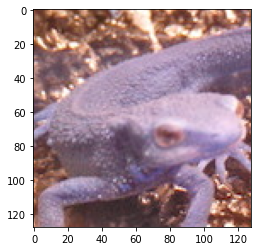

In [5]:
ans = img.copy()[:, :, ::-1]
plt.imshow(ans)

## Q.2. グレースケール化

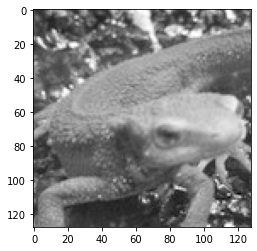

In [6]:
ans = img.copy()
ans = ans[:, :, 0] * 0.2126 + ans[:, :, 1] * 0.7152 + ans[:, :, 2] * 0.0722
plt.imshow(ans, cmap='gray')

## Q.3. 二値化

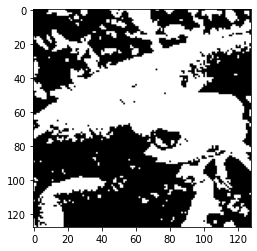

In [7]:
ans = img.copy()
ans = ans[:, :, 0] * 0.2126 + ans[:, :, 1] * 0.7152 + ans[:, :, 2] * 0.0722
ans[ans < 128] = 0
ans[ans >= 128] = 1
plt.imshow(ans, cmap='gray')

## Q.4. 大津の二値化

In [8]:
def get_ootsu_threshold(lum):
    best_score = None
    best_thre = None
    for i in range(256):
        w1 = np.sum(lum < i)
        w2 = np.sum(lum >= i)
        m1 = np.sum(lum[lum < i]) / (w1 + 1e-18)
        m2 = np.sum(lum[lum >= i]) / (w2 + 1e-18)
        score = w1 * w2 * (m1 - m2) ** 2
        if best_score is None or best_score < score:
            best_score = score
            best_thre = i
    
    return best_thre

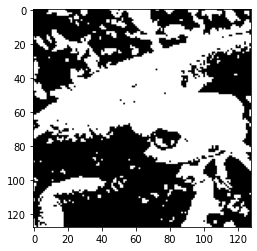

In [9]:
ans = img.copy()
ans = ans[:, :, 0] * 0.2126 + ans[:, :, 1] * 0.7152 + ans[:, :, 2] * 0.0722
ans = ans.astype(np.uint8)

best_thre = get_ootsu_threshold(ans)

ans[ans < best_thre] = 0
ans[ans >= best_thre] = 1
plt.imshow(ans, cmap='gray')

## Q.5. HSV変換

In [10]:
def rgb_to_hsv(rgb):
    rgb = rgb.astype(np.float) / 255
    hsv = np.zeros_like(rgb)
    hsv[:, :, 1] = np.max(rgb, axis=2) - np.min(rgb, axis=2)
    hsv[:, :, 2] = np.max(rgb, axis=2)

    hsv[:, :, 0] = np.where(
        rgb[:, :, 2] == np.min(rgb, axis=2),
        60 * (rgb[:, :, 1] - rgb[:, :, 0]) / (hsv[:, :, 1] + 1e-18) + 60,
        hsv[:, :, 0],
    )
    hsv[:, :, 0] = np.where(
        rgb[:, :, 0] == np.min(rgb, axis=2),
        60 * (rgb[:, :, 2] - rgb[:, :, 1]) / (hsv[:, :, 1] + 1e-18) + 180,
        hsv[:, :, 0],
    )
    hsv[:, :, 0] = np.where(
        rgb[:, :, 1] == np.min(rgb, axis=2),
        60 * (rgb[:, :, 0] - rgb[:, :, 2]) / (hsv[:, :, 1] + 1e-18) + 300,
        hsv[:, :, 0],
    )

    hsv[:, :, 0] %= 360
    
    return hsv

def hsv_to_rgb(hsv):
    V = hsv[:, :, 2]

    C = hsv[:, :, 1]
    H = hsv[:, :, 0] / 60
    X = C * (1 - np.abs(H % 2 - 1))
    
    rgb = np.zeros_like(hsv)
    
    rgb[:, :, 0] = np.where((0 <= H) * (H < 1), C, rgb[:, :, 0])
    rgb[:, :, 1] = np.where((0 <= H) * (H < 1), X, rgb[:, :, 1])
    rgb[:, :, 0] = np.where((1 <= H) * (H < 2), X, rgb[:, :, 0])
    rgb[:, :, 1] = np.where((1 <= H) * (H < 2), C, rgb[:, :, 1])
    rgb[:, :, 1] = np.where((2 <= H) * (H < 3), C, rgb[:, :, 1])
    rgb[:, :, 2] = np.where((2 <= H) * (H < 3), X, rgb[:, :, 2])
    rgb[:, :, 1] = np.where((3 <= H) * (H < 4), X, rgb[:, :, 1])
    rgb[:, :, 2] = np.where((3 <= H) * (H < 4), C, rgb[:, :, 2])
    rgb[:, :, 2] = np.where((4 <= H) * (H < 5), C, rgb[:, :, 2])
    rgb[:, :, 0] = np.where((4 <= H) * (H < 5), X, rgb[:, :, 0])
    rgb[:, :, 2] = np.where((5 <= H) * (H < 6), X, rgb[:, :, 2])
    rgb[:, :, 0] = np.where((6 <= H) * (H < 6), C, rgb[:, :, 0])
    rgb += np.expand_dims(V - C, axis=2)

    rgb = np.clip(rgb, 0, 1)
    rgb = (rgb * 255).astype(np.uint8)

    return rgb

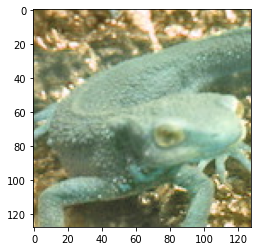

In [11]:
rgb = img.copy()
hsv = rgb_to_hsv(rgb)
hsv[:, :, 0] = (hsv[:, :, 0] + 180) % 360
ans = hsv_to_rgb(hsv)

plt.imshow(ans)

## Q.6. 減色処理

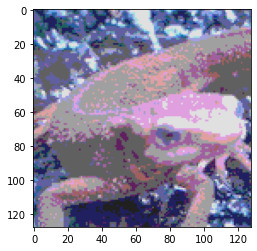

In [12]:
ans = img.copy()
ans[(0 <= ans) * (ans < 64)] = 32
ans[(64 <= ans) * (ans < 128)] = 96
ans[(128 <= ans) * (ans < 192)] = 160
ans[(192 <= ans) * (ans < 256)] = 224

plt.imshow(ans)

## Q.7. 平均プーリング

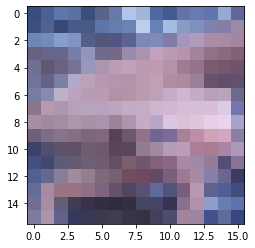

In [13]:
orig = img.copy()
ans = np.zeros((img.shape[0] // 8, img.shape[1] // 8, 3), dtype=np.uint8)

for i in range(orig.shape[0] // 8):
    for j in range(orig.shape[1] // 8):
        ans[i, j] = np.mean(orig[i * 8 : (i + 1) * 8, j * 8 : (j + 1) * 8], axis=(0, 1))

plt.imshow(ans)

## Q.8. Maxプーリング

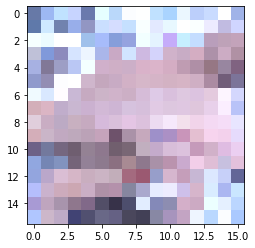

In [14]:
orig = img.copy()
ans = np.zeros((img.shape[0] // 8, img.shape[1] // 8, 3), dtype=np.uint8)

for i in range(orig.shape[0] // 8):
    for j in range(orig.shape[1] // 8):
        ans[i, j] = np.max(orig[i * 8 : (i + 1) * 8, j * 8 : (j + 1) * 8], axis=(0, 1))

plt.imshow(ans)

## Q.9. ガウシアンフィルタ

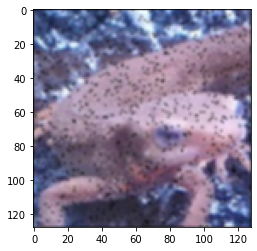

In [15]:
orig = noise_img.copy()
ans = np.zeros_like(orig, dtype=np.uint8)

padded = np.zeros((orig.shape[0] + 2, orig.shape[1] + 2, orig.shape[2]), dtype=np.uint8)
padded[1:-1, 1:-1] = orig

gaussian_filter = np.expand_dims(np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1],
]), axis=2) / 16
for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        ans[i, j] = np.sum(padded[i:i+3, j:j+3] * gaussian_filter, axis=(0, 1))

plt.imshow(ans)

## Q.10. メディアンフィルタ

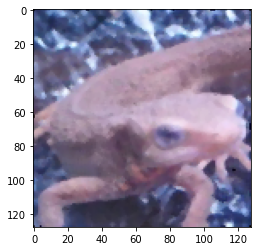

In [16]:
orig = noise_img.copy()
ans = np.zeros_like(orig, dtype=np.uint8)

padded = np.zeros((orig.shape[0] + 2, orig.shape[1] + 2, orig.shape[2]), dtype=np.uint8)
padded[1:-1, 1:-1] = orig

for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        ans[i, j] = np.median(padded[i:i+3, j:j+3], axis=(0, 1))

plt.imshow(ans)